Use this Excel file "test-data-generator.xlsx" to create a random set of aircraft which has 3 maintenance events each, all at ~36 month intervals. Copy the results to a file titled "test.xlsx

In [358]:
df = pd.read_excel('test.xlsx', names=['Aircraft', 'Date'])  # Read the excel file into a pandas DataFrame and rename the columns
df



,Aircraft,Date
0,1,2026-11-01
1,1,2029-12-01
2,2,2024-01-01
3,2,2027-03-01
4,2,2030-05-01
...,...,...
120,41,2026-12-01
121,41,2029-12-01
122,42,2024-01-01
123,42,2026-09-01


### Create Maintenance events summary metrics to help sense check source data


In [359]:
# Create some summary metrics
num_unique_aircraft = df['Aircraft'].nunique()  # Count the number of unique aircraft
print(f"Dataset contains: {num_unique_aircraft} unique aircraft")  # Print the number of unique aircraft

# Convert datetime to just date, removing time and find the min and max date
min_date, max_date = df['Date'].dt.date.agg(['min', 'max'])

# Calculate the number of years between min_date and max_date
num_years = (max_date - min_date).days / 365

print(f"Dataset date range: {min_date} – {max_date} ({num_years:.1f} years)")  # Print the date range


Dataset contains: 42 unique aircraft
Dataset date range: 2024-01-01 – 2030-06-01 (6.4 years)


### Calculate Inspection Intervals from Maintenance Events

In [360]:
# Convert the data to a DataFrame for easier manipulation
df = pd.DataFrame(df)

# Calculate the difference between consecutive dates for each aircraft
df['Difference'] = df.groupby('Aircraft')['Date'].diff()

# Convert the difference to months
df['Difference_in_Months'] = df['Difference'].dt.days / 30

# Calculate the mean and mode difference
mean_difference_in_months = round(df['Difference_in_Months'].mean(), 2)
print(f"The mean time between maintenance events is {mean_difference_in_months} months.")

mode_difference_in_months = round(df['Difference_in_Months'].mode()[0], 2)
print(f"The mode time between maintenance events is {mode_difference_in_months} months.")

The mean time between maintenance events is 36.12 months.
The mode time between maintenance events is 36.53 months.


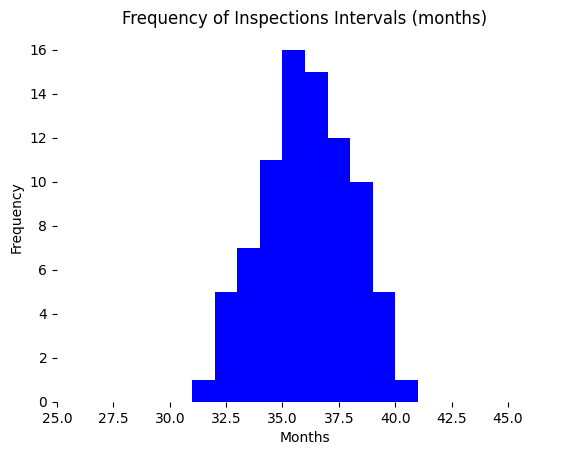

In [361]:
import matplotlib.pyplot as plt  # Importing matplotlib library for plotting

# Plotting a histogram of the difference in months between maintenance events
df['Difference_in_Months'].dropna().hist(bins=range(int(df['Difference_in_Months'].min()-5), int(df['Difference_in_Months'].max()+5)+2), grid=False, color='blue')  # Creating a histogram
plt.title("Frequency of Inspections Intervals (months)")  # Setting the title of the plot
plt.xlabel("Months")  # Setting the x-label of the plot
plt.ylabel("Frequency")  # Setting the y-label of the plot
ax = plt.gca()  # Getting the current axes
ax.set_frame_on(False)  # Removing the frame
plt.show()  # Displaying the plot
